<a href="https://colab.research.google.com/github/SonnyDev/llm-apps-langchain/blob/main/Amount_of_Time_for_Binary_Tree_to_Be_Infected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem

You are given the root of a binary tree with unique values, and an integer start. At minute 0, an infection starts from the node with value start.

Each minute, a node becomes infected if:

- The node is currently uninfected.
- The node is adjacent to an infected node.

Return the number of minutes needed for the entire tree to be infected.

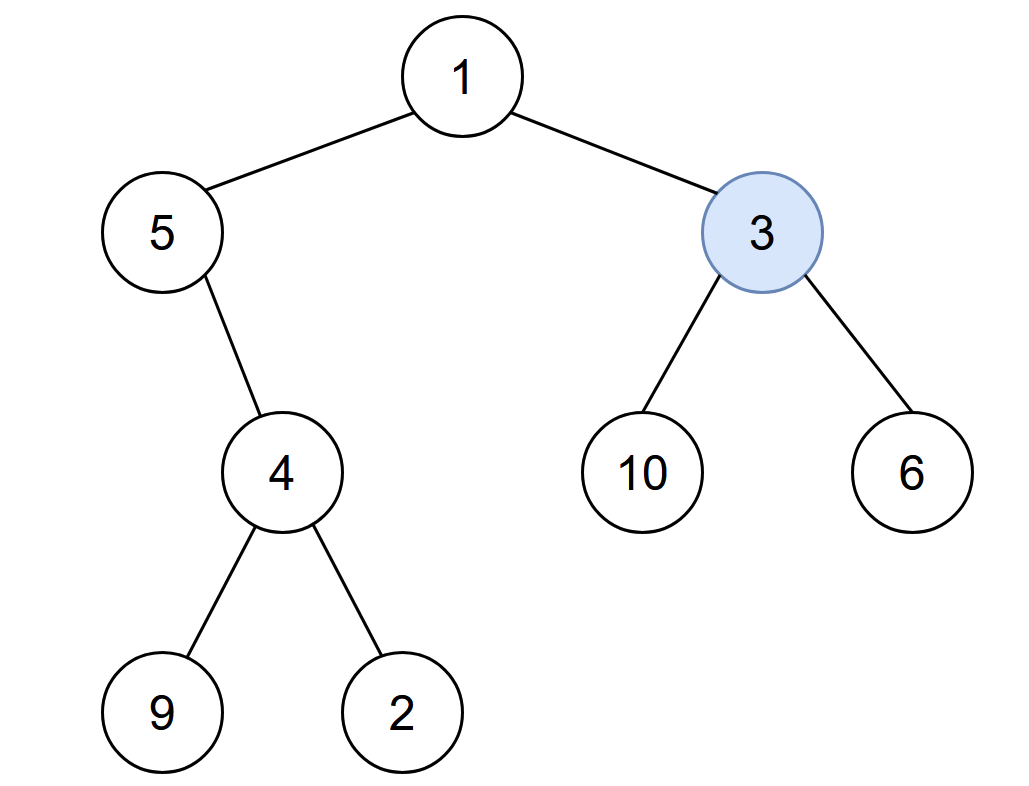

```
Input: root = [1,5,3,null,4,10,6,9,2], start = 3
Output: 4
Explanation: The following nodes are infected during:
- Minute 0: Node 3
- Minute 1: Nodes 1, 10 and 6
- Minute 2: Node 5
- Minute 3: Node 4
- Minute 4: Nodes 9 and 2
It takes 4 minutes for the whole tree to be infected so we return 4.

```

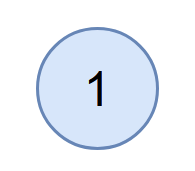

```
Input: root = [1], start = 1
Output: 0
Explanation: At minute 0, the only node in the tree is infected so we return 0.

```

Constraints:

- The number of nodes in the tree is in the range [1, 105].
- 1 <= Node.val <= 105
- Each node has a unique value.
- A node with a value of start exists in the tree.

## Solution

To solve this problem, we can perform a breadth-first search (BFS) starting from the node with the value start.


#### Graph Construction:

- Convert the binary tree into a graph representation using a dictionary to efficiently handle the large range of node values.
- Initialize an empty set for each node when it's first encountered to ensure that all nodes are present in the graph before their connections (edges) are added.
- Recursively traverse the tree, adding both child-to-parent and parent-to-child connections to represent the tree as an undirected graph.

#### Breadth-First Search (BFS):

- Implement BFS starting from the start node to simulate the infection spread.
- Use a queue to track nodes at the current level and their associated time (minutes).
- Keep a set of visited nodes to avoid reprocessing the same node.

#### Calculating Infection Time:

- During BFS, update the time for each level of nodes processed.
- The time to infect the entire tree corresponds to the deepest level reached in the BFS.

#### Memory and Performance Considerations:

- The use of a dictionary for graph representation ensures efficient access and storage, crucial for handling a large number of nodes.
- The BFS approach ensures that each node is processed only once, keeping the time complexity linear with respect to the number of nodes.

In [2]:
from collections import deque

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def build_graph(self, node, parent, graph):
        if node:
            if node.val not in graph:
                graph[node.val] = set()
            if parent:
                if parent.val not in graph:
                    graph[parent.val] = set()
                graph[node.val].add(parent.val)
                graph[parent.val].add(node.val)
            if node.left:
                self.build_graph(node.left, node, graph)
            if node.right:
                self.build_graph(node.right, node, graph)

    def amountOfTime(self, root, start) -> int:
        graph = {}
        self.build_graph(root, None, graph)

        visited = set()
        queue = deque([(start, 0)])
        max_minutes = 0

        while queue:
            node, minutes = queue.popleft()
            if node in visited:
                continue
            visited.add(node)
            max_minutes = max(max_minutes, minutes)

            for neighbor in graph.get(node, []):
                if neighbor not in visited:
                    queue.append((neighbor, minutes + 1))

        return max_minutes

## New Section